# Preliminary check, word frequency


In [17]:
#We use the NLTK language processing library

import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = 'C:/Users/Lerog/Documents/M1/IRTM/txt2'  

inaug = PlaintextCorpusReader(corpus_root, '.*txt')  # all files ending in 'txt' 

inaug.fileids()

#Example of word tokenazation of first 50 words
print(inaug.words()[:50])
    
# Corpus size in number of words
print("Number of words in corpus", len(inaug.words()))

# Building word frequency distribution for the entire corpus
inaug_freq = nltk.FreqDist(inaug.words())
inaug_freq.most_common(10)

['Emergencies', 'Coronavirus', 'EC', 'Meeting', '22', 'January', '2020', 'Speaker', 'key', ':', 'TA', 'DH', 'TAG', 'MR', 'SB', 'MVK', 'MC', 'SN', 'HB', 'JC', 'JG', 'DG', 'GS', 'BU', 'GE', 'BM', 'JZ', 'UF', 'UM', 'Tarik', 'Jasarevic', 'Professor', 'Didier', 'Houssin', 'Dr', 'Tedros', 'Adhanom', 'Ghebreyesus', 'Dr', 'Michael', 'Ryan', 'Dr', 'Sylvie', 'Briand', 'Dr', 'Maria', 'van', 'Kerkhove', 'Marco', 'Clementi']
Number of words in corpus 932192


[('the', 36242),
 ('.', 35775),
 (',', 32389),
 ('to', 27264),
 ('and', 26221),
 ('of', 19391),
 ('that', 17999),
 ("'", 16296),
 ('in', 15234),
 ('we', 14682)]

# Punctation Removal


In [11]:
#remove punctuation from all .txt in a directory
from string import punctuation
import os
import re

def remove_punc(string):
    punc = '''!()-{};:"\<>,[]/?@#$%^&*_~'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string

loop_dir= 'C:/Users/Lerog/Documents/M1/IRTM/txt2/'
save_dir = 'C:/Users/Lerog/Documents/M1/IRTM/PunctuationDot/'

# Open a file and read it into memory
for txt in os.listdir(loop_dir):
    file = open(loop_dir + txt)
    save_file = open(save_dir + txt, 'w')
    text = file.read()
    # Apply the stoplist to the text
    save_file.write(remove_punc(text))

Folder Punctuation is all text with no punctuation at all, PunctuationDot is all text with no punctuation except the '.'

# Stop Words Removal

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import os

# Bring in the stop words
#stoplist = stopwords.words('list.txt')
stoplist = stopwords.words('english')



# change loop dir to the FULL path of where all .txt files reside
# change save path to a dir where the new stop word removed txt files saved
loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/Punctuation/"
save_dir= "C:/Users/Lerog/Documents/M1/IRTM/Stopword/"

# Open a file and read it into memory
for txt in os.listdir(loop_dir):
    file = open(loop_dir + txt)
    save_file = open(save_dir + txt, 'w')
    text = file.read()
    # Apply the stoplist to the text
    cleaned = [word for word in text.split() if word not in stoplist]
    save_file.writelines(["%s " % item  for item in cleaned])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmatization


In [4]:
#Tagging and Lemmatization with SpaCy
import spacy
import os 
nlp = spacy.load("en_core_web_sm")
loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/StopwordDot/"
save_dir= "C:/Users/Lerog/Documents/M1/IRTM/LemmatizationDot/"
#loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/Stopword/"
#save_dir= "C:/Users/Lerog/Documents/M1/IRTM/Lemmatization/"
for txt in os.listdir(loop_dir):
  file = open(loop_dir + txt)
  save_file = open(save_dir + txt, 'w')
  text = file.read()
  doc = nlp(text)
  for token in doc:
    save_file.writelines(["%s " %token.lemma_])
#save_file.writelines(['(',token.lemma_,',', token.tag_ ,')'])
#print(token.text, token.lemma_, token.pos_, token.tag_)


# Tokenization


In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import os
import re

loop_dir= "C:/Users/Lerog/Documents/M1/IRTM/Lemmatization/"
save_dir = "C:/Users/Lerog/Documents/M1/IRTM/Wordtoken/"

# Open a file and read it into memory
for txt in os.listdir(loop_dir):
    file = open(loop_dir + txt)
    save_file = open(save_dir + txt, 'w')
    text = file.read()
    save_file.writelines(["%s " % word_tokenize(text)])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Topic modeling

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import os


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(topic_idx)
        print([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topic_idx = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]

loop_dir ="C:/Users/Lerog/Documents/M1/IRTM/Wordtoken/"

documents=[]
for txt in os.listdir(loop_dir):
  file = open(loop_dir + txt)
  text = file.read()
  documents.append(text)

no_features = 1000

#We use tf-idf as an input for NMF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()



#for n in [5,10,15,20,25,30]:
n=20
no_topics = n

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)


no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

topics = []
feature_names = tfidf_feature_names
for topic_idx, topic in enumerate(nmf.components_):
  topics.append([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])

0
['tj', 'covid19', 'pandemic', 'week', 'individual', 'mk', 'worker', 'maria', 'solidarity', 'vaccine']
1
['china', 'outbreak', 'wuhan', 'ship', 'tj', 'sb', 'chinese', 'cruise', 'window', 'hubei']
2
['mh', 'margaret', 'unmute', 'mask', 'young', 'cluster', 'physical', 'study', 'kerkhove', 'van']
3
['fc', 'fadela', 'trial', 'accelerator', 'clinical', 'phase', 'young', 'safety', 'diagnostic', 'pcr']
4
['school', 'child', 'adolescent', 'education', 'reopen', 'woman', 'young', 'study', 'unicef', 'pandemic']
5
['ta', 'committee', 'humantohuman', 'china', 'emergency', 'action', 'chinese', 'wuhan', 'member', 'state']
6
['trial', 'hydroxychloroquine', 'drug', 'patient', 'datum', 'safety', 'clinical', 'soumya', 'arm', 'covid19']
7
['vaccine', 'covax', 'candidate', 'aylward', 'accelerator', 'bruce', 'antibody', 'dose', 'facility', 'swaminathan']
8
['trace', 'suppress', 'vaccine', 'unity', 'life', 'month', 'tracing', 'difficult', 'save', 'brazil']
9
['iran', 'containment', 'china', 'contain', 'kor

# Sentiment analysis

In [7]:
#Testing negation handling of Vader
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
 
sentences = ["Football is a great sport to burn calories.", "Football is not a great sport to burn calories.",
             "Football is really not a great sport to burn calories.","I like football.","I dislike football."]

for sentence in sentences:
    print(sentence)
    print(sia.polarity_scores(sentence)["compound"])

Football is a great sport to burn calories.
0.6249
Football is not a great sport to burn calories.
-0.5096
Football is really not a great sport to burn calories.
-0.5533
I like football.
0.3612
I dislike football.
-0.3818


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
import pandas as pd
import nltk
import os
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/LemmatizationDot/"
rates = []
index = []
i=0
for txt in os.listdir(loop_dir):
    file = open(loop_dir + txt)
    text = file.read()
    positivity = 0
    m=0
    for sentence in nltk.sent_tokenize(text):
        m += 1
        positivity += sia.polarity_scores(sentence)["compound"]
    rates.append(positivity/m)
    index.append(i)
    i+=1
print(len(rates))
print(len(index))
df = pd.DataFrame.from_dict({'Sentiment':rates,'index':index})
df.to_excel('sentimentmonth.xlsx', header=True, index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


100
100


In [20]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/LemmatizationDot/"
rates = []
relevant_sentences = []
occurences = []

for i in range(n):
    relevant_sentences.append([])
    for txt in os.listdir(loop_dir):
        file = open(loop_dir + txt)
        text = file.read()
        for sentence in nltk.sent_tokenize(text):
            for token in topics[i]:
                if token in sentence:
                    relevant_sentences[i].append(sentence)
    relevant_sentences[i] = list(dict.fromkeys(relevant_sentences[i]))
    m = len(relevant_sentences[i])+1
    positivity = 0
    for sentence in relevant_sentences[i]:
      positivity += sia.polarity_scores(sentence)["compound"]
    rates.append(positivity/m)
    occurences.append(m)
print(len(rates))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


20


In [9]:
print(len(occurences))
print(len(topics))

df = pd.DataFrame.from_dict({'topic':topics,'Sentiment':rates,'Occurences':occurences})
df.to_excel('sentimenttotal.xlsx', header=True, index=False)

20
20


In the following cell we take the 20 topics as an input.
Then, for each topic and its 10 most frequent words :
We analyse the overall sentiment of the topic in each document by summing the sentiment of each phrase containing a word of the topic.
We also count the occurences of the topic in each document.

In [11]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/LemmatizationDot/"  
rates = []
relevant_sentences = []
occurences = []
for txt in os.listdir(loop_dir):
  relevant_sentences = []
  file = open(loop_dir + txt)
  text = file.read()
  for i in range(n):
    relevant_sentences.append([])
    for sentence in nltk.sent_tokenize(text):
      for token in topics[i]:
        if token in sentence:
          relevant_sentences[i].append(sentence)
    relevant_sentences[i] = list(dict.fromkeys(relevant_sentences[i]))
    m = len(relevant_sentences[i])+1
    positivity = 0
    for sentence in relevant_sentences[i]:
      positivity += sia.polarity_scores(sentence)["compound"]
    rates.append(positivity/m)
    occurences.append(m)
print(len(rates))
  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lerog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2000


In [12]:
topics = topics*100
print(len(occurences))
print(len(topics))
index = []
for i in range(100):
  for j in range(20):
    index.append(i)
df = pd.DataFrame.from_dict({'topic':topics,'Sentiment':rates, 'index':index,'Occurences':occurences})
df.to_excel('sentimentbydoc.xlsx', header=True, index=False)

2000
2000


In [6]:
import numpy as np
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel, HdpModel, LdaMulticore
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet
from gensim.corpora import Dictionary
import os
from nltk.tokenize import word_tokenize
documents=[]
loop_dir = "C:/Users/Lerog/Documents/M1/IRTM/Lemmatization/" 
for txt in os.listdir(loop_dir):
  file = open(loop_dir + txt)
  text = file.read()
  documents.append([word for word in word_tokenize(text)])
#print(documents[0])
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(text) for text in documents]
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]


ldatf = LdaMulticore(corpus_tfidf, num_topics=8, id2word=dictionary, passes=10, workers=10)
for idx, topic in ldatf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldatf, texts=documents ,dictionary = dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
coherence_model_lda = CoherenceModel(model=ldatf, texts=documents ,dictionary = dictionary, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Topic: 0 Word: 0.001*"MH" + 0.001*"TJ" + 0.001*"and" + 0.001*"FC" + 0.001*"child" + 0.001*"school" + 0.001*"tj" + 0.000*"Iran" + 0.000*"TA" + 0.000*"COVAX"
Topic: 1 Word: 0.000*"MH" + 0.000*"Catharina" + 0.000*"Olympics" + 0.000*"Julia" + 0.000*"decisive" + 0.000*"mutation" + 0.000*"Facility" + 0.000*"Trial" + 0.000*"Poland" + 0.000*"Pawel"
Topic: 2 Word: 0.000*"Kosovo" + 0.000*"IMF" + 0.000*"Georgieva" + 0.000*"Doolio" + 0.000*"Kristalina" + 0.000*"liquidity" + 0.000*"KG" + 0.000*"Zeltner" + 0.000*"JM" + 0.000*"Jamey"
Topic: 3 Word: 0.000*"Liang" + 0.000*"Hunt" + 0.000*"Sy" + 0.000*"Mission" + 0.000*"Joint" + 0.000*"Brundtland" + 0.000*"Ryder" + 0.000*"fs" + 0.000*"Gro" + 0.000*"EAS"
Topic: 4 Word: 0.000*"HVJ" + 0.000*"©" + 0.000*"Ã" + 0.000*"la" + 0.000*"nous" + 0.000*"que" + 0.000*"les" + 0.000*"qui" + 0.000*"pas" + 0.000*"vous"
Topic: 5 Word: 0.000*"Jacqueline" + 0.000*"CL" + 0.000*"demos" + 0.000*"pan" + 0.000*"Iran" + 0.000*"Katrin" + 0.000*"Banjot" + 0.000*"Ashleigh" + 0.000*"Ch

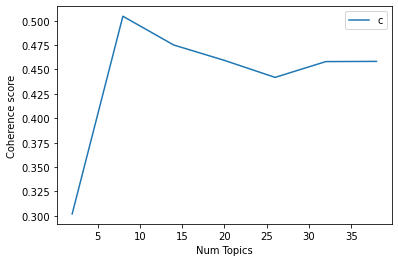

In [4]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes=5, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=documents, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

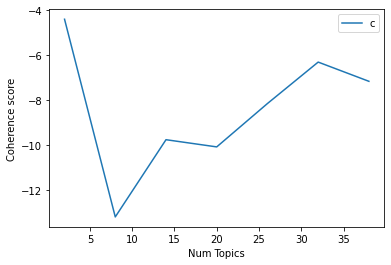

In [5]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes=5, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=documents, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
#Kappa distance measure
import pandas as pd
df = pd.read_csv('Validation.csv', sep=",",header=None)
print(df.head())
j=0
A = 0
B = 0
C = 0
D = 0
for i in df[0]:
    k = df.iloc[j,3]
    if i == 1 and k == 1:
        A+=1
    if i == -1 and k == -1:
        D+=1
    if i == 1 and k == -1:
        B+=1
    if i == -1 and k == 1:
        C+=1
    j+=1
print(A,B)
print(C,D)
p0=(A+D)/(A+B+C+D)
pyes=((A+B)/(A+B+C+D))*((A+C)/(A+B+C+D))
pno=((B+D)/(A+B+C+D))*((C+D)/(A+B+C+D))
pe=pyes+pno
kappa = (p0-pe)/(1-pe)
print("Kappa value is", kappa)

   0     1                                                  2  3     4
0  1   0 9  Good evening again to everyone and thank you v...  1   0 8
1  1   0 4  Thanks also to all journalists who are online ...  1   0 4
2 -1  -0 5         We are late  so I will just keep it short. -1  -0 3
3  1   0 1  You know today was the first meeting of the Em...  1   0 2
4  1   0 6  And good evening to everyone in the room and e...  1   0 4
51 1
0 18
Kappa value is 0.963273871983211
